In [24]:
from __future__ import print_function
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow
import glob
import os
import pandas as pd
import seaborn as sns
from scipy import stats
from IPython.display import display, HTML

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

In [25]:
# Set some standard parameters upfront
pd.options.display.float_format = '{:.1f}'.format
sns.set() # Default seaborn look and feel
plt.style.use('ggplot')
print('keras version ', keras.__version__)
# Same labels will be reused throughout the program
LABELS = ['[1]Sitting-on-Bed',
          '[2]Sitting-on-Chair',
          '[3]Lying-Down',
          '[4]Ambulating']
# The number of steps within one time segment
TIME_PERIODS = 80
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 40

keras version  2.2.4


In [26]:
def read_data(file_path):

    column_names = ['time',
                    'frontal-acceleration',
                    'vertical-acceleration',
                    'lateral-acceleration',
                    'antenna-id',
                    'RSSI',
                    'phase',
                    'frequency',
                    'label']
    
    df = pd.read_csv(file_path,
                     header=None,
                     names=column_names)

    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df.dropna(axis=0, how='any', inplace=True)

    return df

def convert_to_float(x):

    try:
        return np.float(x)
    except:
        return np.nan
 
def show_basic_dataframe_info(dataframe):

    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [27]:
# Load data set containing all the data from csv

df = read_data('/Users/Mariana/Desktop/S1_Dataset/d1p46M')

#import errno
#path = '/Users/Mariana/Desktop/S1_Dataset/*.'
#files = glob.glob(path)
#for name in files:
#        with open(name) as f:
#            df = read_data(f)


In [28]:
# Describe the data
show_basic_dataframe_info(df)
df.head(20)

Number of columns in the dataframe: 9
Number of rows in the dataframe: 2542



,time,frontal-acceleration,vertical-acceleration,lateral-acceleration,antenna-id,RSSI,phase,frequency,label
0,0.0,0.5,0.9,0.1,1,-62.0,0.4,923.2,1
1,0.0,0.5,0.9,0.1,1,-62.0,0.4,923.2,1
2,0.1,0.5,0.9,0.1,1,-62.0,0.4,923.2,1
3,0.5,0.5,0.9,0.1,1,-63.0,5.2,921.2,1
4,0.5,0.5,0.9,0.1,1,-63.0,5.2,921.2,1
5,0.6,0.5,0.9,0.1,1,-63.0,5.2,921.2,1
6,0.6,0.5,0.9,0.1,1,-63.0,5.2,921.2,1
7,0.6,0.5,0.9,0.1,1,-63.0,5.2,921.2,1
8,2.5,0.2,1.0,-0.0,4,-56.0,5.0,920.2,1
9,2.5,0.2,1.0,-0.0,4,-56.0,5.0,920.2,1


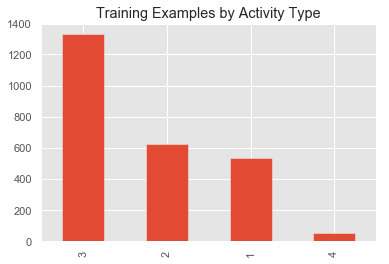

[1]Sitting-on-Bed
[2]Sitting-on-Chair
[3]Lying-Down
[4]Ambulating


In [29]:
df['label'].value_counts().plot(kind='bar',
                                   title='Training Examples by Activity Type')

plt.show()

for i in LABELS:
    print(i)